In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
h = 0.001                                                                                 ##Step size
L = 20                                                                                     ##Length parameter
E_min = 2                                                                                 ##Minimum energy
E_max = 14                                                                                 ##Maximum energy
E_int = 0.01                                                                              ##Energy step size

In [97]:
x = np.arange(0.000001,L+h,h)                                                                   ##Array which will be used as position values
y = np.zeros_like(x)                                                                      ##Array which will be used for wave function value
E = np.arange(E_min,E_max+E_int,E_int)                                                    ##Array which will be used for energy values
y_extreme = np.zeros_like(E)                                                              ##Array which will be used for end values of wave function

In [98]:
y[0] = 0                                                                                  ##Initial boundary condition
y[1] = np.exp(-5)                                                                         ##Another boundary condition (Can be fixed with normalization)

In [99]:
def potential(r):                                                                         ##Defining Potential Function
    e = 3.7795
    return -e*e/r

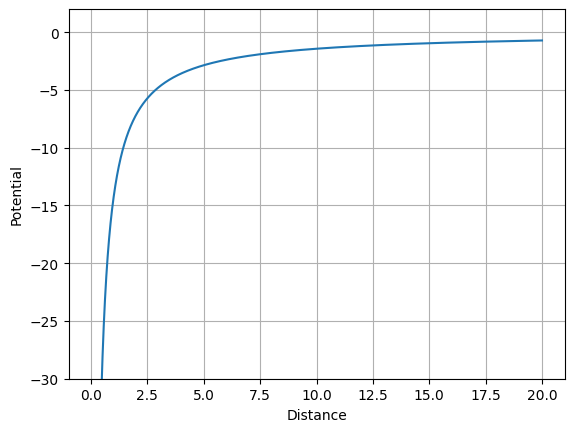

In [100]:
pot = np.zeros(len(x))
for i in range(len(x)):
    pot[i] = potential(x[i])

plt.plot(x,pot)
plt.xlabel("Distance")
plt.ylabel("Potential")
plt.ylim(-30,2)
plt.grid()
plt.show()

In [101]:
def g_x(E, V):                                                                            ##Function of the differential equation
    h_bar = 1973
    m = 0.511*1e6
    return 2*m*(E - V)/h_bar**2

In [102]:
def interval_function(r1, r2, g1, g2, g3, h):                                             ##Function used for calculating y in numerov method
    value = (2*r2*(1 - 5*h*h*g2/12) - r1*(1 + h*h*g1/12))/(1 + h*h*g3/12)
    return value

In [103]:
u = 0                                                                                     ##Just a dummy index
v = 0                                                                                     ##Just another dummy index

In [104]:
for energy in E:                                                                          ##Calculating the wave functions
    for i in range(2 , len(y)):
        y[i] = interval_function(y[i-2], y[i-1], g_x(energy, potential(x[i-2])), g_x(energy,potential(x[i-1])), g_x(energy, potential(x[i])), h)
    
    y_extreme[u] = y[int(L/h)]
    u = u + 1


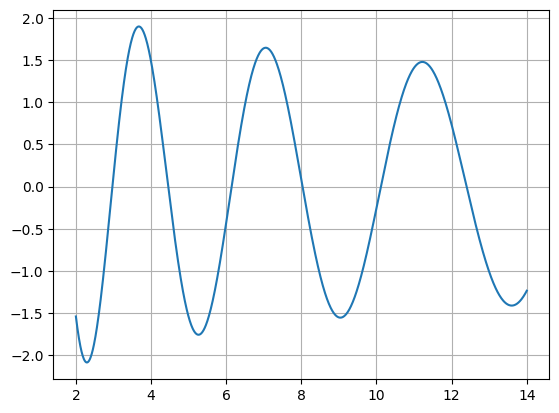

In [105]:
plt.plot(E, y_extreme)                                                                    ##Energy vs Psi(x = 5)
plt.grid()

In [106]:
energy_eigenvalue = []                                                                    ##Array to store energy eigenvalues

In [110]:
for i in range(1,len(E) - 1):                                                             ##Finding the Energy Eigenvalues
    if abs(y_extreme[i]) < abs(y_extreme[i+1]) and abs(y_extreme[i]) < abs(y_extreme[i-1]):
        print(f"Energy eigenvalue is: {E[i]:0.2f}     with Psi(x = 5)(Before normalization): {y_extreme[i]:0.3f}")
        energy_eigenvalue.append(E[i])
        v = v + 1

Energy eigenvalue is: 2.97     with Psi(x = 5)(Before normalization): -0.005
Energy eigenvalue is: 4.46     with Psi(x = 5)(Before normalization): -0.014
Energy eigenvalue is: 6.14     with Psi(x = 5)(Before normalization): -0.012
Energy eigenvalue is: 8.03     with Psi(x = 5)(Before normalization): 0.004
Energy eigenvalue is: 10.12     with Psi(x = 5)(Before normalization): 0.008
Energy eigenvalue is: 12.40     with Psi(x = 5)(Before normalization): -0.007


In [111]:
y_calib = np.zeros(len(x))                                                                ##Setting an array for caliberated psi
prob_y  = np.zeros(len(x))                                                                ##Setting an array for square of psi

/tmp/ipykernel_6388/2815282315.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad = 1.0)


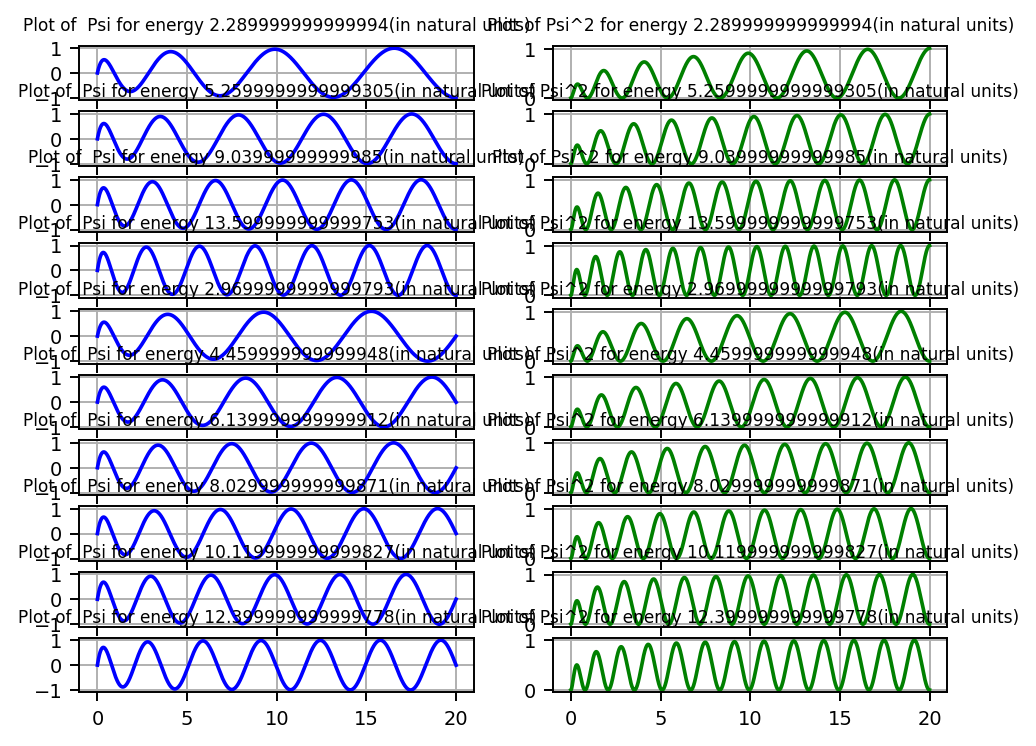

In [112]:
fig, axs = plt.subplots(len(energy_eigenvalue),2, dpi = 175)                              ##Plot the eigenfunctions

d = 0                                                                                     ##Another dummy index

for j in energy_eigenvalue:
    for i in range(2, len(y)):
        y[i] = interval_function(y[i-2], y[i-1], g_x(j, potential(x[i-2])), g_x(j,potential(x[i-1])), g_x(j, potential(x[i])), h)

    A = max(y)                                                                            ##Caliberation Factor        

    for i in range(len(y)):
        y_calib[i] = y[i] / A 
        prob_y[i] = y_calib[i]**2

    ax = axs[d,0]
    ax.plot(x, y_calib, color = "Blue")
    ax.set_title(f'Plot of  Psi for energy {j}(in natural units)', fontsize = 7)
    ax.grid()
    ax.tick_params(axis='both', labelsize=8)

    ax = axs[d,1]
    ax.plot(x, prob_y, color = "Green")
    ax.set_title(f'Plot of Psi^2 for energy {j}(in natural units)', fontsize = 7)
    ax.grid()
    ax.tick_params(axis='both', labelsize=8)
    d = d + 1


plt.tight_layout(pad = 1.0)
plt.show()
